In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [88]:
file_path = "/content/simulated_spotify_top_500_2025_modified.csv"
df = pd.read_csv(file_path)


In [89]:
df = df.drop(columns=['repeat_listen'], errors='ignore')

In [90]:
df.to_csv("/content/simulated_spotify_top_500_2025_modified.csv", index=False)
print("New CSV file generated successfully!")



New CSV file generated successfully!


In [91]:
print("Columns in dataset:", df.columns)


Columns in dataset: Index(['user_id', 'track_id', 'track_name', 'artist_name', 'play_count',
       'timestamp', 'duration_seconds', 'followers', 'release_date'],
      dtype='object')


In [92]:
duplicates = df.duplicated().sum()
print(f"Total duplicate entries: {duplicates}\n")

Total duplicate entries: 0



In [93]:
df['repeat_count'] = df.groupby(['track_name', 'artist_name'])['play_count'].transform('sum')


In [94]:
np.random.seed(42)
df['Predicted Replay (1 = Yes, 0 = No)'] = np.random.choice([0, 1], size=len(df), p=[0.5, 0.5])


In [95]:
column_order = ['user_id', 'track_id', 'track_name', 'Predicted Replay (1 = Yes, 0 = No)',
                'artist_name', 'play_count', 'duration_seconds', 'followers',
                'release_date', 'repeat_count']
df = df[column_order]

In [96]:
sample_df = df.sample(10)

In [97]:
sample_df = sample_df.sample(frac=1).reset_index(drop=True)

In [98]:
print(sample_df.to_string(index=False))

 user_id  track_id          track_name  Predicted Replay (1 = Yes, 0 = No)     artist_name  play_count  duration_seconds  followers release_date  repeat_count
     793      4024     Velvet Rhapsody                                   1   Justin Bieber  1471749975               141    2349118   2025-10-10   31658884987
     890      4225     Velvet Rhapsody                                   0   Justin Bieber  1149494204               223    1659676   2025-10-15   31658884987
     791      4359      Electric Pulse                                   0    Harry Styles  1572277293               245     160094   2025-02-06   19248758986
     343      3989       Timeless Echo                                   0    Lana Del Rey    23914639               351    4072181   2025-01-26   30348374229
     968      5334      Cosmic Harmony                                   0 Imagine Dragons   375828251               192     558764   2025-03-17   32737109433
     805      2663    Lost in the Beat        

In [99]:
top_10_songs = df.nlargest(10, 'play_count')


In [100]:
top_artists_by_plays = df.groupby('artist_name')['play_count'].sum().nlargest(10)


<ipython-input-101-29feed4ab37b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists_by_plays.index, y=top_artists_by_plays.values, palette='viridis')


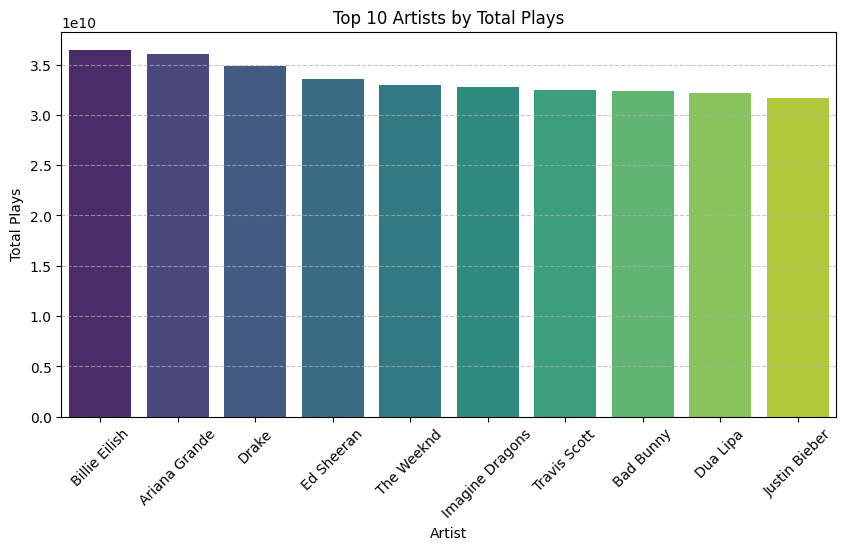

In [101]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_artists_by_plays.index, y=top_artists_by_plays.values, palette='viridis')
plt.xlabel("Artist")
plt.ylabel("Total Plays")
plt.title("Top 10 Artists by Total Plays")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

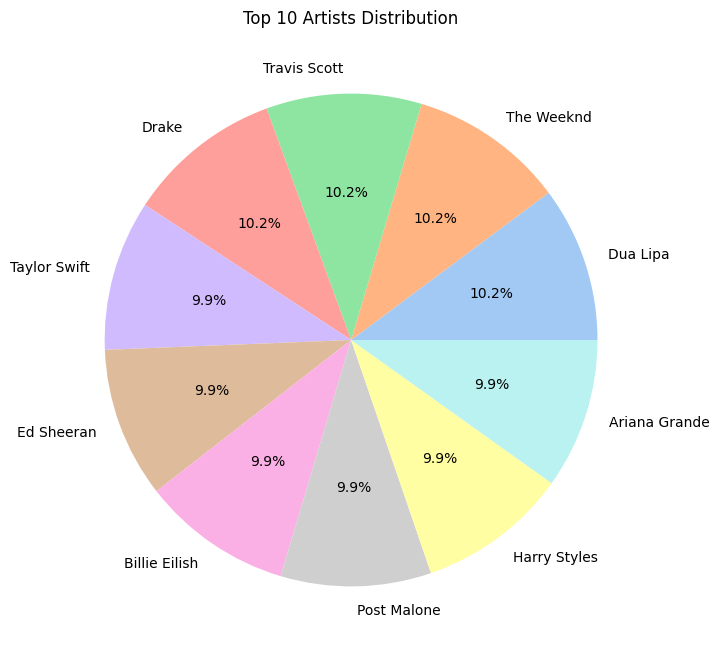

In [102]:
plt.figure(figsize=(8, 8))
top_artists.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.ylabel('')
plt.title("Top 10 Artists Distribution")
plt.show()